In [1]:
import pandas as pd
import numpy as np

In [21]:
data = pd.read_csv( "../../../../../../Escritorio/Admission_Predict.csv" )
data.head()

,Serial,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
import matplotlib.pyplot as plt

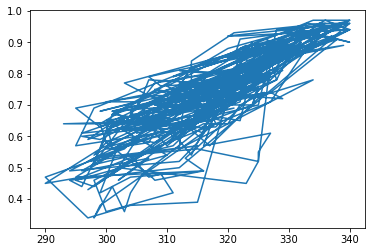

In [22]:
%matplotlib inline
plt.plot( data["GRE_Score"], data["Chance_of_Admit"] )

In [9]:
import statsmodels.formula.api as smf

In [23]:
lm = smf.ols( formula="Chance_of_Admit~GRE_Score", data=data ).fit()

In [24]:
lm.params

Intercept   -2.436084
GRE_Score    0.009976
dtype: float64

In [25]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Chance_of_Admit   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.643
Method:                 Least Squares   F-statistic:                     720.6
Date:                Thu, 10 Jan 2019   Prob (F-statistic):           2.46e-91
Time:                        14:15:09   Log-Likelihood:                 418.65
No. Observations:                 400   AIC:                            -833.3
Df Residuals:                     398   BIC:                            -825.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.4361      0.118    -20.677      0.000      -2.668      -2.204
GRE_Score      0.0100      0.000     26.843      0.000       0.009       0.011
==============================================================================
Omnibus:                       52.605   Durbin-Watson:                   0.858
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.715
Skew:                          -0.860   Prob(JB):                     1.33e-17
Kurtosis:                       4.307   Cond. No.                     8.77e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 8.77e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [26]:
admit_pred = lm.predict( pd.DataFrame( data["GRE_Score"] ) )
admit_pred

0      0.925788
1      0.796102
2      0.716294
3      0.776150
4      0.696343
5      0.855957
6      0.766174
7      0.636487
8      0.576632
9      0.786126
10     0.806077
11     0.826029
12     0.836005
13     0.626512
14     0.666415
15     0.696343
16     0.726270
17     0.746222
18     0.736246
19     0.586608
20     0.676391
21     0.806077
22     0.836005
23     0.895860
24     0.915812
25     0.955716
26     0.776150
27     0.536729
28     0.506801
29     0.656439
         ...   
370    0.656439
371    0.796102
372    0.915812
373    0.766174
374    0.706319
375    0.596584
376    0.526753
377    0.456922
378    0.586608
379    0.666415
380    0.776150
381    0.746222
382    0.796102
383    0.556680
384    0.955716
385    0.905836
386    0.576632
387    0.626512
388    0.516777
389    0.756198
390    0.696343
391    0.736246
392    0.816053
393    0.726270
394    0.845981
395    0.796102
396    0.806077
397    0.855957
398    0.676391
399    0.885884
Length: 400, dtype: floa

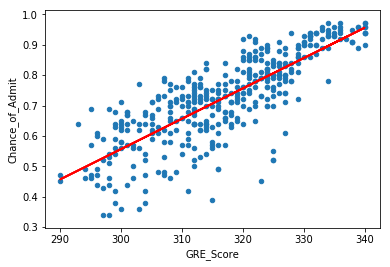

In [27]:
%matplotlib inline
data.plot( kind="scatter", x="GRE_Score", y="Chance_of_Admit" )
df = pd.DataFrame( data["GRE_Score"] )
plt.plot( df, admit_pred, c="red", linewidth=2 )

In [28]:
data[ "prediction" ] = -2.436084 + 0.009976 * data[ "GRE_Score" ]

In [29]:
data.head()

,Serial,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Chance_of_Admit,prediction
0,1,337,118,4,4.5,4.5,9.65,1,0.92,0.925828
1,2,324,107,4,4.0,4.5,8.87,1,0.76,0.796140
2,3,316,104,3,3.0,3.5,8.00,1,0.72,0.716332
3,4,322,110,3,3.5,2.5,8.67,1,0.80,0.776188
4,5,314,103,2,2.0,3.0,8.21,0,0.65,0.696380


In [36]:
SSD = np.sum( (data[ "Chance_of_Admit" ] - data[ "prediction" ])**2 )
SSD # Std Dev

2.8873197635839984

In [32]:
RSE = np.sqrt( SSD/(len(data)-2) )
RSE # Residual Standard Error (std dev)

0.08517377689354602

In [40]:
admit_mean = np.mean( data["Chance_of_Admit"] )
predict_mean = np.mean( data["prediction"] )
admit_mean, predict_mean # The predictive model increases slightly admittance chances mean

(0.7243499999999996, 0.7243876199999998)

In [35]:
error = RSE / admit_mean
error # 11.76% of the model's variance is not explained.

0.1175864939511922